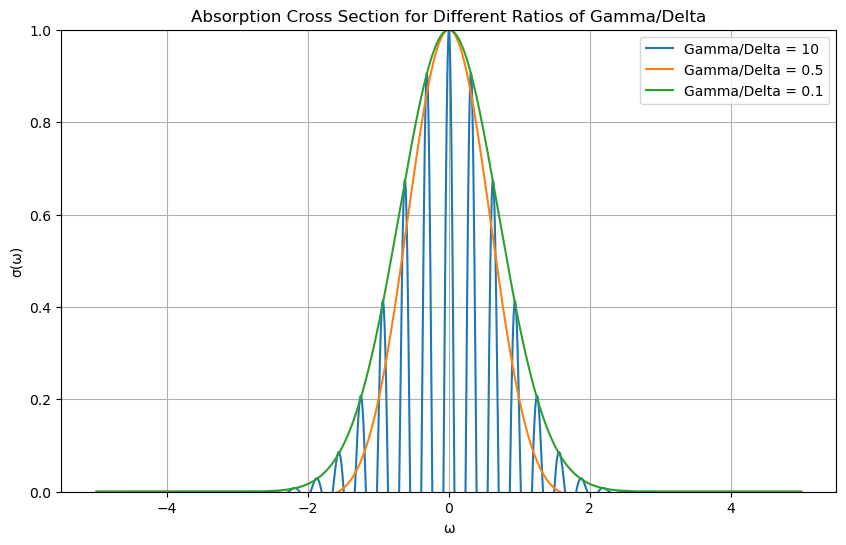

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def absorption_cross_section(omega, omega_0, Gamma, Delta):
    term1 = (1/(6 * np.pi)) * np.exp((1j * (omega - omega_0) - Gamma)**2) / (2 * Delta**2)
    term2 = np.sqrt(2 * np.pi / Delta**2)
    return term1 * term2

omega = np.linspace(-5, 5, 2000)
omega_0 = 0
Delta = 1
ratios = [10, 0.5, 0.1]

plt.figure(figsize=(10, 6))
for ratio in ratios:
    Gamma = ratio * Delta
    sigma = absorption_cross_section(omega, omega_0, Gamma, Delta)
    # normalize the distribution
    sigma /= np.max(np.abs(sigma))
    plt.plot(omega, np.real(sigma), label=f'Gamma/Delta = {ratio}')

plt.xlabel('ω')
plt.ylabel('σ(ω)')
plt.ylim(0, 1)
plt.title('Absorption Cross Section for Different Ratios of Gamma/Delta')
plt.legend()
plt.grid(True)
plt.show()


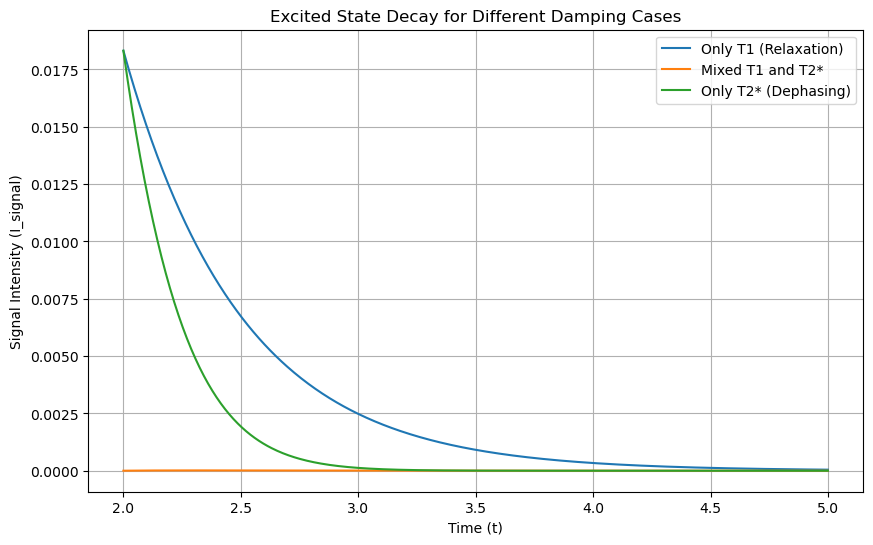

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(2, 5, 500)  # Start from 0 for full range

# Parameters for the cases
Gamma = 1.0
Delta = 1.0

# Signal intensities
I_T1n = np.exp(-2 * Gamma * t)
I_T2star = np.exp(-Delta**2 * t**2)

# I_T1_T2star will be a convolution of the two
I_T1_T2star = np.convolve(I_T1n, I_T2star, mode='full')[:len(t)] / len(t) # Normalize

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, I_T1n, label='Only T1 (Relaxation)')
plt.plot(t, I_T1_T2star, label='Mixed T1 and T2*')
plt.plot(t, I_T2star, label='Only T2* (Dephasing)')
plt.xlabel('Time (t)')
plt.ylabel('Signal Intensity (I_signal)')
plt.title('Excited State Decay for Different Damping Cases')
plt.legend()
plt.grid(True)
plt.show()


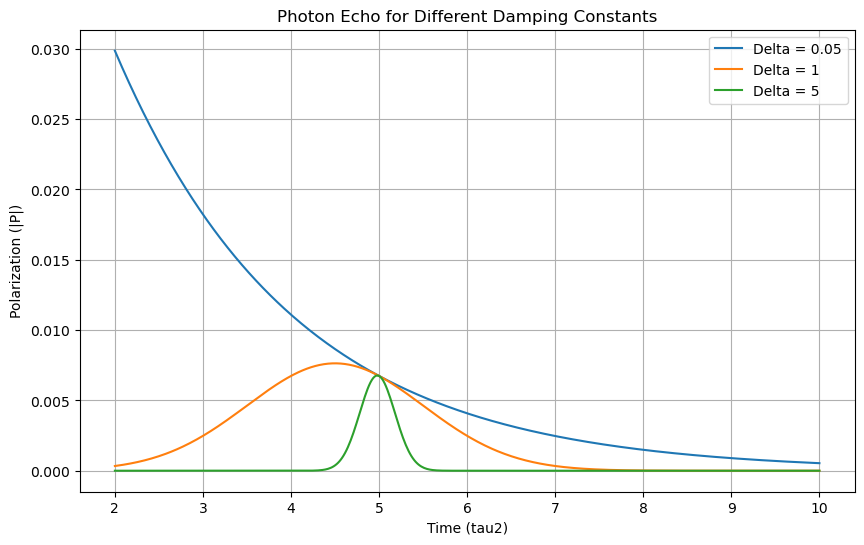

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
tau1 = 5
omega0 = 1
Gamma = 0.5
Delta_values = [0.05, 1, 5]

# Time array for tau2
tau2 = np.linspace(2, 10, 500)

# Function to calculate the polarization
def polarization(tau1, tau2, omega0, Gamma, Delta):
    return np.exp(1j * omega0 * (tau1 - tau2) - Gamma * (tau1 + tau2) - (Delta**2 * (tau1 - tau2)**2) / 2)

# Plotting the photon echo for different Delta values
plt.figure(figsize=(10, 6))

for Delta in Delta_values:
    P = np.abs(polarization(tau1, tau2, omega0, Gamma, Delta))
    plt.plot(tau2, P, label=f'Delta = {Delta}')

plt.xlabel('Time (tau2)')
plt.ylabel('Polarization (|P|)')
plt.title('Photon Echo for Different Damping Constants')
plt.legend()
plt.grid(True)
plt.show()


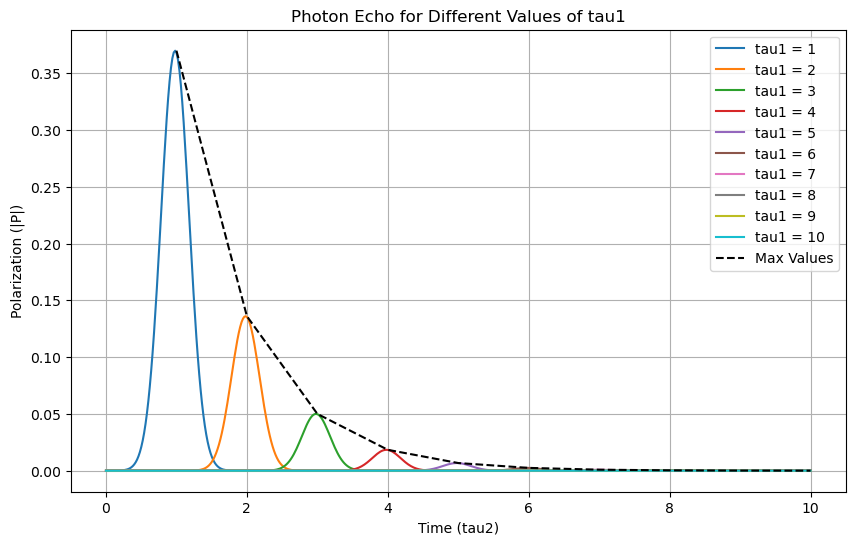

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for this part
Gamma = 0.5
Delta = 5
tau1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
omega0 = 1

# Time array for tau2
tau2 = np.linspace(0, 10, 500)

# Function to calculate the polarization
def polarization(tau1, tau2, omega0, Gamma, Delta):
    return np.exp(1j * omega0 * (tau1 - tau2) - Gamma * (tau1 + tau2) - (Delta**2 * (tau1 - tau2)**2) / 2)

# Plotting the photon echo for different tau1 values
plt.figure(figsize=(10, 6))
# make a dictionary to store the maximum value of the photon echo for each tau1
max_values = {}
for tau1 in tau1_values:
    P = np.abs(polarization(tau1, tau2, omega0, Gamma, Delta))
    max_values[tau1] = np.max(P)
    plt.plot(tau2, P, label=f'tau1 = {tau1}')

# plod a dashed line connecting all the maximum values of tau1 that we had tabulated against the responding tau2
plt.plot(tau1_values, list(max_values.values()), 'k--', label='Max Values')

plt.xlabel('Time (tau2)')
plt.ylabel('Polarization (|P|)')
plt.title('Photon Echo for Different Values of tau1')
plt.legend()
plt.grid(True)
plt.show()
